<a href="https://colab.research.google.com/github/pooja614/ML_DL_projects/blob/main/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy 
import pandas as pd             
import numpy as np              
import matplotlib.pyplot as plt    
import seaborn as sns              
import tensorflow as tf        
import os                        
import nltk
import warnings                      
import pandas as pd 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np  

from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk   

# from IPython import as plt
# warnings.filterwarnings('ignore')
# display.set_matplotlib_formats('svg')          
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.model_selection import train_test_split        

folder_path = '/content/drive/MyDrive/Projects/sentiment_analysis/' 
# f_path = '/content/drive/MyDrive/Projects/sentiment_analysis/preprocessed_kindle_review .csv'

dtypes_b = { 
    'reviewText':'string', 
    'rating':'int32', 
}   

# df= pd.read_csv(folder_path+ '/preprocessed_kindle_review .csv', usecols=['rating', 'reviewText'], dtype = dtypes_b) 
df_a= pd.read_csv(folder_path+ '/preprocessed_kindle_review .csv',dtype = dtypes_b)


In [2]:
df = df_a[['rating','reviewText']]

In [3]:
df.head()                           

,rating,reviewText
0,5,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,5,I just had to edit this review. This book is a...
3,5,I don't normally buy 'mystery' novels because ...
4,5,"This isn't the kind of book I normally read, a..."


In [15]:
df.iloc[4]['reviewText']

"This isn't the kind of book I normally read, although I try not to limit myself to certain genres. Sometimes I find epic fantasies a little tedious. Not so with this one! There wasn't one paragraph in this story that didn't hold my interest. Ty Johnston has a wonderful way with words so that his scenes come alive for the reader. I'm definitely buying books two and three of this trilogy!"

In [ ]:
df.shape               

(12000, 2)

In [41]:
reviews = [r for r in df['reviewText']] 
tokenized_reviews = pd.Series(reviews).apply(lambda x:str(x).split())
print(tokenized_reviews[0])  

nlp = spacy.load('en_core_web_sm')

def lemmatization(texts, tags=['NOUN', 'ADJ']):
  output = []
  for sent in texts:
    doc = nlp(" ".join(sent)) 
    output.append([token.lemma_ for token in doc if token.pos_ in tags])
  return output 

# lemmatize reviews 
lemm_reviews = lemmatization(tokenized_reviews)
print(lemm_reviews[0]) 

reviews_3 = []
for i in range(len(lemm_reviews)):
  reviews_3.append(' '.join(lemm_reviews[i]))

df['reviews'] = reviews_3  



['This', 'book', 'bookmobile', 'book', 'I', 'bought', 'I', 'school', 'book', 'club.', 'I', 'loved', 'story', 'I', 'bet', 'dollar', 'donut', 'I', 'love', 'again.', 'If', 'memory', 'serves,', 'I', 'bought', 'book', '5th', 'grade.', 'That', '1961.', 'I', 'looking', 'forward', 'reliving', 'memories.']
['book', 'bookmobile', 'book', 'school', 'book', 'club', 'story', 'dollar', 'donut', 'memory', 'book', '5th', 'grade', 'memory']


In [ ]:
words = ' '.join(text for text in df['reviews'])

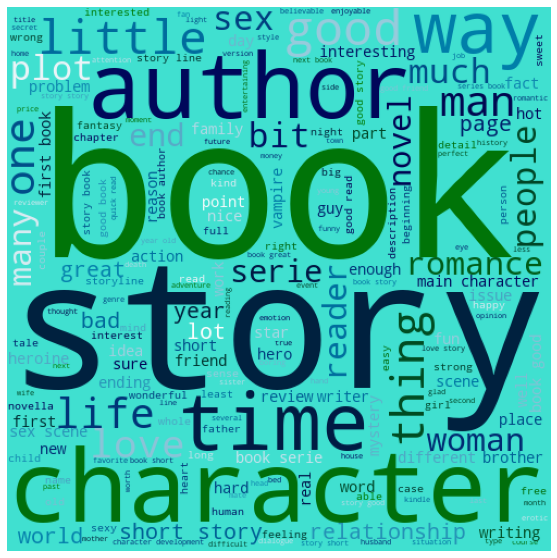

In [ ]:
  #ploting the word cloud 
import wordcloud
from wordcloud import WordCloud
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

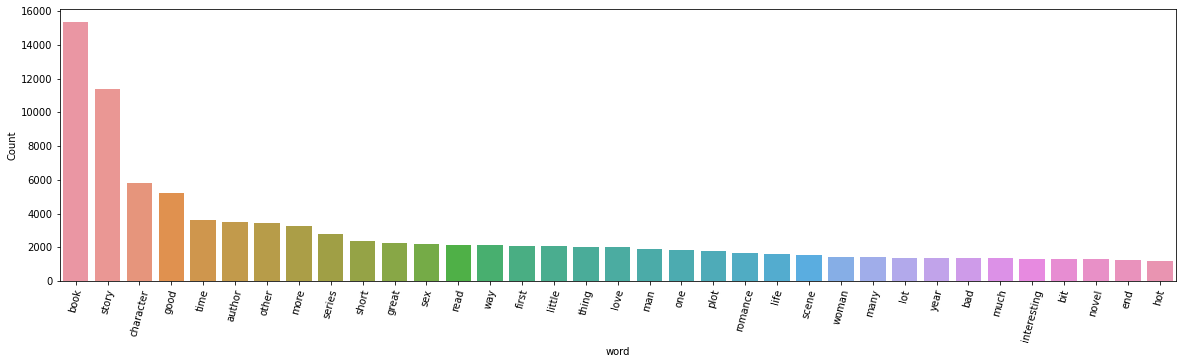

In [ ]:
# Most frequent words 
from nltk.probability import FreqDist 

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.xticks(rotation=75)
  plt.show()  



freq_words(df['reviews'], 35) 

### Latent Dirichlet Allocation[LDA]

In natural language processing, Latent Dirichlet Allocation (LDA) is a generative statistical model that explains a set of observations through unobserved groups, and each group explains why some parts of the data are similar. The LDA is an example of a topic model. In this, observations (e.g., words) are collected into documents, and each word's presence is attributable to one of the document's topics. Each document will contain a small number of topics.

In [ ]:
# Building an LDA model 
import gensim 
from gensim import corpora
from gensim.corpora import Dictionary

# create the term dictionary of corpus 
dictionary = corpora.Dictionary(lemm_reviews) 
# convert into document term matrix 
doc_term_matrix = [dictionary.doc2bow(rev) for rev in lemm_reviews] 
LDA = gensim.models.ldamodel.LdaModel
# Creating object for LDA model 
lda_model= LDA(corpus=doc_term_matrix, id2word=dictionary, 
               num_topics=7, 
               random_state=100,
               chunksize=1000,
               passes=50) 

In [ ]:
lda_model.print_topics() 

[(0,
  '0.017*"tale" + 0.015*"word" + 0.013*"many" + 0.010*"error" + 0.009*"collection" + 0.008*"work" + 0.008*"author" + 0.007*"reader" + 0.007*"sentence" + 0.007*"time"'),
 (1,
  '0.015*"case" + 0.013*"fiction" + 0.010*"science" + 0.008*"cover" + 0.007*"mystery" + 0.006*"price" + 0.005*"light" + 0.005*"easy" + 0.005*"kindle" + 0.005*"car"'),
 (2,
  '0.017*"life" + 0.016*"year" + 0.012*"old" + 0.012*"world" + 0.008*"people" + 0.007*"family" + 0.006*"thing" + 0.006*"child" + 0.006*"day" + 0.006*"time"'),
 (3,
  '0.024*"story" + 0.016*"man" + 0.016*"love" + 0.015*"sex" + 0.013*"woman" + 0.011*"hot" + 0.011*"other" + 0.011*"romance" + 0.011*"good" + 0.010*"book"'),
 (4,
  '0.014*"killer" + 0.011*"horror" + 0.008*"serial" + 0.008*"fi" + 0.007*"thriller" + 0.006*"soul" + 0.006*"historical" + 0.005*"sci" + 0.005*"voice" + 0.005*"violence"'),
 (5,
  '0.098*"book" + 0.060*"story" + 0.033*"character" + 0.028*"good" + 0.022*"author" + 0.016*"more" + 0.015*"series" + 0.015*"time" + 0.014*"other"

In [ ]:
!pip install pyldavis

In [ ]:
# Visualize the topics 
import pyLDAvis
import pyLDAvis.gensim_models as gensim 
pyLDAvis.enable_notebook()
vis = gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis  

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.302657  0.009897       1        1  40.252137
3      0.256461  0.060017       2        1  30.469591
2      0.047633  0.013474       3        1  10.598904
0     -0.033356 -0.221146       4        1   6.905289
4     -0.209734  0.166414       5        1   3.996535
6     -0.192928 -0.162406       6        1   3.890409
1     -0.170733  0.133751       7        1   3.887136, topic_info=              Term          Freq         Total Category  logprob  loglift
1             book  14640.000000  14640.000000  Default  30.0000  30.0000
10           story  10856.000000  10856.000000  Default  29.0000  29.0000
18       character   5490.000000   5490.000000  Default  28.0000  28.0000
13          author   3336.000000   3336.000000  Default  27.0000  27.0000
32            good   5018.000000   5018.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
1168      military     38.691832     93.988355   Topic7  -5.8434   2.3600
925   entertaining     46.008371    261.430970   Topic7  -5.6702   1.5102
443      adventure     44.530837    235.321723   Topic7  -5.7028   1.5827
1144         small     43.988627    282.146847   Topic7  -5.7150   1.3890
38     interesting     41.150185   1245.063399   Topic7  -5.7818  -0.1622

[460 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
73        1  0.199667       -
73        2  0.241389       -
73        3  0.202647       -
73        4  0.131125       -
73        5  0.089403       -
...     ...       ...     ...
72        6  0.004561    year
490       2  0.400466   young
490       3  0.335629   young
490       6  0.261257   young
1397      3  0.990809  zombie

[740 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 1, 5, 7, 2])

* The intent of salience is to help identify which words are the most informative words for identifying topics in all the documents. Higher saliency values indicate that a word is more useful for identifying a specific topic. 


In [ ]:
# Compute Coherence Score 
from gensim.models import CoherenceModel
# Compute Perplexity
print('\nPerplexity : ', lda_model.log_perplexity(doc_term_matrix)) 

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()


Perplexity :  -7.293593075956063


In [ ]:
print('\nCoherence Score: ', coherence_lda);


Coherence Score:  0.3391266972993448


* This notebook is mainly focused on basic LDA implementation. The concept will be further explored based on dataset. <br>
References:<br>
https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation <br>
https://www.kaggle.com/code/pranjalsoni17/topic-modelling-using-lda/notebook 

In [ ]:
!pip install bertopic

In [98]:
# bertTopic model 
from bertopic import BERTopic
topic_model = BERTopic(calculate_probabilities=True)
topics, probabilties=topic_model.fit_transform(df['reviews']) 

In [106]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,6543,-1_book_story_character_author
1,0,504,0_sex_scene_erotic_hot
2,1,324,1_character_storyline_plot_development
3,2,225,2_short_story_length_novella
4,3,208,3_vampire_human_club_demon
...,...,...,...
108,107,11,107_line_faviourtie_flowedsorry_lil
109,108,10,108_group_voice_recovery_audio
110,109,10,109_magic_husband_wife_pregnant
111,110,10,110_finish_erach_enthralled_estimation


In [107]:
cs = topic_model.get_topic_info()
cs.to_csv(folder_path+ 'topics.csv', index=False)  

In [99]:
topic_model.get_topic(0)

[('sex', 0.05071810966336775),
 ('scene', 0.023998362962879997),
 ('erotic', 0.023262739528548876),
 ('hot', 0.01521289243842543),
 ('short', 0.014837873768395668),
 ('porn', 0.013336687794447692),
 ('story', 0.012031966041843338),
 ('sexual', 0.0118461948479637),
 ('book', 0.01155462130442923),
 ('erotica', 0.011453929253039832)]

In [100]:
topic_model.visualize_barchart(top_n_topics=20)

Barchart of top 5 words in the respective topic groups is visualized. 

In [101]:
topic_model.visualize_topics() 

In [102]:
topic_model.visualize_heatmap() 

### Calculate the probabilities of topics found in reviews.
* The distribution of the probabilities does not give an indication to the distribution of the frequencies of topics across a document. It merely shows how confident BERTopic is that certain topics can be found in a document.

In [103]:
topic_model.visualize_distribution(probabilties[1])

In [105]:
topic_model.visualize_distribution(probabilties[2])


In [108]:
topic_model.visualize_distribution(probabilties[16])

### Text based topic tree

In [110]:
hierarchical_topics = topic_model.hierarchical_topics(df['reviews'])

100%|██████████| 111/111 [00:00<00:00, 156.84it/s]


In [109]:
topic_model.get_topic(9)


[('mystery', 0.10733140845813502),
 ('suspense', 0.059231972534758544),
 ('secret', 0.02417111439908309),
 ('thriller', 0.022020156490185433),
 ('suspenseful', 0.019281536606476902),
 ('interesting', 0.016092615967373353),
 ('great', 0.015071385179377672),
 ('read', 0.014358907409705593),
 ('twist', 0.013435828072148348),
 ('book', 0.012790098509999804)]

In [111]:
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

.
├─book_good_zombie_article_series
│    ├─zombie_case_recipe_western_fairy
│    │    ├─line_three_cheery_fortified_flowedsorry
│    │    │    ├─■──line_faviourtie_flowedsorry_lil_bloodline ── Topic: 107
│    │    │    └─■──line_three_fortified_cheery_two ── Topic: 98
│    │    └─zombie_case_recipe_western_fairy
│    │         ├─zombie_case_recipe_western_fairy
│    │         │    ├─case_charger_cord_protection_cover
│    │         │    │    ├─■──charger_cord_usb_adapter_charge ── Topic: 48
│    │         │    │    └─■──case_protection_cover_zipper_leather ── Topic: 36
│    │         │    └─zombie_recipe_western_fairy_tea
│    │         │         ├─zombie_recipe_fairy_western_tea
│    │         │         │    ├─island_adventure_balloon_castaway_submarine
│    │         │         │    │    ├─■──submarine_translation_undersea_ship_sea ── Topic: 80
│    │         │         │    │    └─island_adventure_balloon_castaway_storm
│    │         │         │    │         ├─■──island_balloon_casta

* The tree represents the words that has been grouped as topics. 

In [112]:
cs[cs.Topic== 9] 

,Topic,Count,Name
10,9,113,9_mystery_suspense_secret_thriller


In [ ]:
topic_model.get_representative_docs()

In [113]:
generated_labels= topic_model.generate_topic_labels() 

In [166]:
generated_labels[:5]

['-1_book_story_character',
 '0_sex_scene_erotic',
 '1_character_storyline_plot',
 '2_short_story_length',
 '3_vampire_human_club']

In [139]:
cs['topic_label'] = generated_labels

* Topic label is generated for the specific set of topics. 
* This can be further used to assign specific name for the topics. 

In [141]:
cs.head()

,Topic,Count,Name,topic_label
0,-1,6543,-1_book_story_character_author,-1_book_story_character
1,0,504,0_sex_scene_erotic_hot,0_sex_scene_erotic
2,1,324,1_character_storyline_plot_development,1_character_storyline_plot
3,2,225,2_short_story_length_novella,2_short_story_length
4,3,208,3_vampire_human_club_demon,3_vampire_human_club


In [142]:
cs.to_csv(folder_path+ 'topics.csv', index=False) 

In [125]:
topics[:10] 

[-1, -1, -1, 9, 44, -1, -1, 9, -1, -1]

In [126]:
len(topics)

12000

In [136]:
probabilties[1]

array([0.00334724, 0.00208947, 0.0015656 , 0.00308877, 0.00640711,
       0.00209552, 0.00350295, 0.00112053, 0.00186284, 0.00244775,
       0.00427205, 0.00168   , 0.00322009, 0.00340486, 0.0057508 ,
       0.00123729, 0.00169703, 0.00389555, 0.00212274, 0.00333059,
       0.00142318, 0.0016226 , 0.00145435, 0.00173503, 0.00088068,
       0.00129293, 0.00178168, 0.01197828, 0.00265659, 0.0012993 ,
       0.00239191, 0.00174807, 0.00291248, 0.00210504, 0.00165556,
       0.0047559 , 0.00095736, 0.00309838, 0.00249132, 0.00458177,
       0.00312078, 0.00149057, 0.00124404, 0.00149251, 0.00359121,
       0.00313668, 0.00153904, 0.00728429, 0.00098075, 0.00488998,
       0.00142251, 0.00330738, 0.00442978, 0.00174356, 0.00232044,
       0.0014684 , 0.00267694, 0.00255398, 0.00180246, 0.00148296,
       0.0013823 , 0.00199003, 0.00181579, 0.00203962, 0.0016036 ,
       0.01040863, 0.00160486, 0.00280764, 0.00227757, 0.00362331,
       0.00171492, 0.00245001, 0.00544017, 0.00136707, 0.00647

In [137]:
df['topics'] = topics 

In [138]:
df.head()

,rating,reviewText,reviews,topics
0,5,This book bookmobile book I bought I school bo...,book bookmobile book school book club story do...,-1
1,1,"When I read description book, I couldn't wait ...",description book honest book slow slow uninter...,-1
2,5,I edit review. This book (I believe I got righ...,review book re - write version favorite BECHET...,-1
3,5,I don't normally buy 'mystery' novels I don't ...,mystery novel time chance glad story character...,9
4,5,"This isn't kind book I normally read, I try li...",kind book certain genre epic fantasy tedious p...,44


In [146]:
topic_words = topic_model.get_topics()

In [148]:
df.head()

,rating,reviewText,reviews,topics
0,5,This book bookmobile book I bought I school bo...,book bookmobile book school book club story do...,-1
1,1,"When I read description book, I couldn't wait ...",description book honest book slow slow uninter...,-1
2,5,I edit review. This book (I believe I got righ...,review book re - write version favorite BECHET...,-1
3,5,I don't normally buy 'mystery' novels I don't ...,mystery novel time chance glad story character...,9
4,5,"This isn't kind book I normally read, I try li...",kind book certain genre epic fantasy tedious p...,44


In [ ]:
# Save all the reults

In [149]:
df.to_csv(folder_path + 'withtopics.csv', index=False) 

In [151]:
the_topics = topic_model.get_topics()

In [155]:
the_topics[1]

[('character', 0.03813450740693855),
 ('storyline', 0.02868987552802496),
 ('plot', 0.023306029746922256),
 ('development', 0.020360318516107024),
 ('great', 0.02010952144699975),
 ('story', 0.018088926290139192),
 ('good', 0.015047555846371546),
 ('interesting', 0.014783446164888121),
 ('read', 0.014034988454040172),
 ('book', 0.0138614512384821)]

In [158]:
the_topics[111]

[('heroine', 0.09079245978359589),
 ('hero', 0.06372549255136459),
 ('rugby', 0.029794425080635106),
 ('sport', 0.028675098539679044),
 ('tampon', 0.028539755676436268),
 ('impulse', 0.026772332336197517),
 ('2nd', 0.026772229876331245),
 ('rake', 0.023084985371928678),
 ('feisty', 0.02175932480848626),
 ('installment', 0.021463724449296225)]

In [159]:
type(the_topics)

dict

In [160]:
df_exp = pd.DataFrame.from_dict(the_topics)

In [161]:
df_exp

,-1,0,1,2,3,4,5,6,7,8,...,102,103,104,105,106,107,108,109,110,111
0,"(book, 0.008341252475574911)","(sex, 0.05071810966336775)","(character, 0.03813450740693855)","(short, 0.07751958399724958)","(vampire, 0.09155261547111962)","(friend, 0.014077599662291688)","(error, 0.05735234080715412)","(killer, 0.06245172737798081)","(article, 0.06319723253599874)","(christian, 0.073110561725764)",...,"(paranoid, 0.14408343270775964)","(preconception, 0.030327629001874273)","(trash, 0.27733453362029975)","(scroll, 0.03388757468058761)","(star, 0.21267733671122627)","(line, 0.22007039804860323)","(group, 0.028553407020244042)","(magic, 0.0664758879123412)","(finish, 0.49377295208133887)","(heroine, 0.09079245978359589)"
1,"(story, 0.00808828137459316)","(scene, 0.023998362962879997)","(storyline, 0.02868987552802496)","(story, 0.030494908081969693)","(human, 0.020984258652666087)","(man, 0.012643367403980262)","(grammar, 0.039017884498209476)","(serial, 0.05817060273919025)","(paper, 0.05383509102341843)","(church, 0.06104631850379487)",...,"(schizophrenic, 0.13660284532588673)","(series, 0.02879141457550805)","(disgusting, 0.1805598444420917)","(crime, 0.030927289166887126)","(lineage, 0.09035031926283837)","(faviourtie, 0.100263413661881)","(voice, 0.0279191277877585)","(husband, 0.063187609156222)","(erach, 0.1414430299872964)","(hero, 0.06372549255136459)"
2,"(character, 0.007836960217675295)","(erotic, 0.023262739528548876)","(plot, 0.023306029746922256)","(length, 0.020289089189919812)","(club, 0.01679830943462374)","(relationship, 0.01066532619930038)","(grammatical, 0.03568039532924131)","(murder, 0.035671564844945415)","(newspaper, 0.05351428515560177)","(religious, 0.05509817806521757)",...,"(schizophrenia, 0.049322337422641735)","(next, 0.020725138049010012)","(stomach, 0.11370731715301302)","(police, 0.028673398357652202)","(devolpment, 0.09035031926283837)","(flowedsorry, 0.100263413661881)","(recovery, 0.027658244012153027)","(wife, 0.047753105478662995)","(enthralled, 0.12907188466119768)","(rugby, 0.029794425080635106)"
3,"(author, 0.007053691561530205)","(hot, 0.01521289243842543)","(development, 0.020360318516107024)","(novella, 0.015189184755168006)","(demon, 0.014328432772551107)","(sexy, 0.01036483246669674)","(sentence, 0.03292141090156934)","(police, 0.0319379598935991)","(blog, 0.05145347877728687)","(faith, 0.03977068548787766)",...,"(argus, 0.047245330481233055)","(storm, 0.019702979637267935)","(petrol, 0.10286765817257923)","(agent, 0.0284855389870047)","(unconvincing, 0.085286541793318)","(lil, 0.08272916518865704)","(audio, 0.027334826056127914)","(pregnant, 0.046576066586809406)","(estimation, 0.12183791684759712)","(sport, 0.028675098539679044)"
4,"(time, 0.006954787679259045)","(short, 0.014837873768395668)","(great, 0.02010952144699975)","(novel, 0.013795268240424591)","(world, 0.010949606766375863)","(night, 0.010338631418792536)","(spelling, 0.02666313263140603)","(crime, 0.030704065426683746)","(subscription, 0.050490557525072886)","(religion, 0.03943716635694813)",...,"(mental, 0.04421201836824682)","(fan, 0.01896166184322316)","(pure, 0.09910605598775843)","(ordeal, 0.027531181522274125)","(unbearable, 0.06908173640111488)","(bloodline, 0.07990915374581198)","(review, 0.025881803199176122)","(fantasy, 0.04551615875016874)","(breathless, 0.10435547625446998)","(tampon, 0.028539755676436268)"
5,"(good, 0.006863126682981481)","(porn, 0.013336687794447692)","(story, 0.018088926290139192)","(little, 0.013531054558281316)","(blood, 0.010766413784092398)","(woman, 0.010277470546793597)","(editing, 0.026468641505941182)","(hitchhiker, 0.018972206239082252)","(magazine, 0.048400430044998194)","(scripture, 0.030370574076203697)",...,"(medication, 0.04320777693727144)","(collaberation, 0.01837774867584362)","(sick, 0.09602753730400339)","(prison, 0.026335744186066403)","(cant, 0.06908173640111488)","(hanger, 0.07760587474669912)","(dough, 0.02586055649741349)","(search, 0.04010508894950341)","(chapter, 0.0929945

In [163]:
df_exp.to_csv(folder_path+ 'topic_scores.csv', index=False) 

In [164]:
type(probabilties)

numpy.ndarray

In [165]:
np.save(folder_path + 'prob',probabilties)

### Future Work

* Generate topic name 
* Sentiment Analysis with topic modelling 